# Dynamic Fare Prediction for Ride-Hailing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("ride_sharing_data.csv")
data

,Distance,Time_of_Day,Demand,Weather,Base_Price,Weather_Multiplier,Price
0,8.116262,Evening,5.671736,Snowy,12,2.0,305.27
1,19.063572,Night,5.312637,Snowy,15,2.0,875.74
2,14.907885,Afternoon,1.230779,Snowy,8,2.0,267.88
3,12.374511,Night,4.071230,Snowy,15,2.0,522.37
4,3.964354,Night,4.421761,Snowy,15,2.0,171.52
...,...,...,...,...,...,...,...
995,2.740059,Morning,5.430929,Rainy,10,1.5,63.42
996,18.428958,Evening,6.195511,Clear,12,1.0,358.16
997,3.599554,Morning,8.790194,Clear,10,1.0,67.64
998,19.054510,Afternoon,9.826654,Rainy,8,1.5,453.34


#  Exploratory Data Analysis

In [3]:
data.head()

,Distance,Time_of_Day,Demand,Weather,Base_Price,Weather_Multiplier,Price
0,8.116262,Evening,5.671736,Snowy,12,2.0,305.27
1,19.063572,Night,5.312637,Snowy,15,2.0,875.74
2,14.907885,Afternoon,1.230779,Snowy,8,2.0,267.88
3,12.374511,Night,4.071230,Snowy,15,2.0,522.37
4,3.964354,Night,4.421761,Snowy,15,2.0,171.52


In [5]:
data.tail()

,Distance,Time_of_Day,Demand,Weather,Base_Price,Weather_Multiplier,Price
995,2.740059,Morning,5.430929,Rainy,10,1.5,63.42
996,18.428958,Evening,6.195511,Clear,12,1.0,358.16
997,3.599554,Morning,8.790194,Clear,10,1.0,67.64
998,19.054510,Afternoon,9.826654,Rainy,8,1.5,453.34
999,9.474110,Night,4.668258,Snowy,15,2.0,416.91


In [8]:
data.shape

(1000, 7)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Distance            1000 non-null   float64
 1   Time_of_Day         1000 non-null   object 
 2   Demand              1000 non-null   float64
 3   Weather             1000 non-null   object 
 4   Base_Price          1000 non-null   int64  
 5   Weather_Multiplier  1000 non-null   float64
 6   Price               1000 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 54.8+ KB


In [14]:
data.describe()

,Distance,Demand,Base_Price,Weather_Multiplier,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,10.314875,5.483440,11.169000,1.491500,263.09109
std,5.550610,2.576445,2.580135,0.412126,182.03787
min,1.088008,1.014086,8.000000,1.000000,14.54000
25%,5.483492,3.310508,8.000000,1.000000,118.85250
50%,10.439340,5.550885,10.000000,1.500000,223.20500
75%,15.142072,7.642966,12.000000,2.000000,366.50500
max,19.994636,9.985128,15.000000,2.000000,1125.45000


# Checking Missing Values

In [16]:
data.isnull().sum()

Distance              0
Time_of_Day           0
Demand                0
Weather               0
Base_Price            0
Weather_Multiplier    0
Price                 0
dtype: int64

# Dropping highly correlated features

In [18]:
data.drop(['Weather_Multiplier'],axis=1,inplace=True)
data.drop(['Base_Price'],axis=1,inplace=True)

# Cheacking Outliers

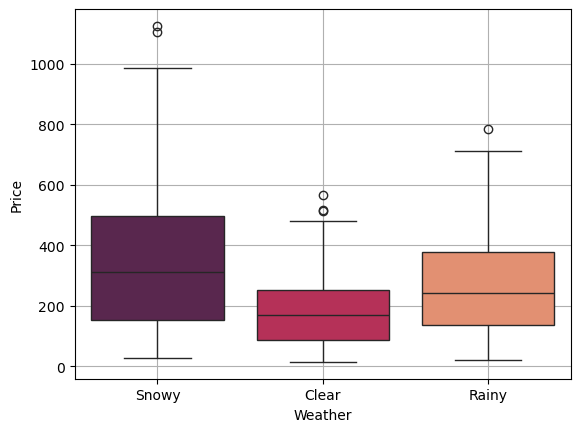

In [20]:
sns.boxplot(data=data,y="Price",x="Weather",palette="rocket")
plt.grid()

# Removing Outliers

In [22]:
def Weather(x,price_threshold):
    Outlier_index=data[(data["Weather"]==x) & (data["Price"]>price_threshold)].index
    data.drop(index=Outlier_index,inplace=True)
    
Weather("Snowy",1000)
Weather("Clear",500)
Weather("Rainy",750)

In [24]:
data.reset_index(inplace=True,drop=True)

In [26]:
data

,Distance,Time_of_Day,Demand,Weather,Price
0,8.116262,Evening,5.671736,Snowy,305.27
1,19.063572,Night,5.312637,Snowy,875.74
2,14.907885,Afternoon,1.230779,Snowy,267.88
3,12.374511,Night,4.071230,Snowy,522.37
4,3.964354,Night,4.421761,Snowy,171.52
...,...,...,...,...,...
989,2.740059,Morning,5.430929,Rainy,63.42
990,18.428958,Evening,6.195511,Clear,358.16
991,3.599554,Morning,8.790194,Clear,67.64
992,19.054510,Afternoon,9.826654,Rainy,453.34


# Splitting data into X & Y

In [28]:
X=data.iloc[:,:-1]
X

,Distance,Time_of_Day,Demand,Weather
0,8.116262,Evening,5.671736,Snowy
1,19.063572,Night,5.312637,Snowy
2,14.907885,Afternoon,1.230779,Snowy
3,12.374511,Night,4.071230,Snowy
4,3.964354,Night,4.421761,Snowy
...,...,...,...,...
989,2.740059,Morning,5.430929,Rainy
990,18.428958,Evening,6.195511,Clear
991,3.599554,Morning,8.790194,Clear
992,19.054510,Afternoon,9.826654,Rainy


In [30]:
Y=data["Price"]
Y=Y.to_frame()
Y

,Price
0,305.27
1,875.74
2,267.88
3,522.37
4,171.52
...,...
989,63.42
990,358.16
991,67.64
992,453.34


# Separting Numerical and categorical Data from "X" 

In [32]:
numerical_cols=X.select_dtypes(include=["float","int"])
numerical_cols

,Distance,Demand
0,8.116262,5.671736
1,19.063572,5.312637
2,14.907885,1.230779
3,12.374511,4.071230
4,3.964354,4.421761
...,...,...
989,2.740059,5.430929
990,18.428958,6.195511
991,3.599554,8.790194
992,19.054510,9.826654


In [34]:
categorical_cols=X.select_dtypes(include=["object"])
categorical_cols

,Time_of_Day,Weather
0,Evening,Snowy
1,Night,Snowy
2,Afternoon,Snowy
3,Night,Snowy
4,Night,Snowy
...,...,...
989,Morning,Rainy
990,Evening,Clear
991,Morning,Clear
992,Afternoon,Rainy


# Using Label Encoder for converting category data into numeric

In [36]:
from sklearn.preprocessing  import LabelEncoder
Le=LabelEncoder() 

for i in categorical_cols:
    categorical_cols[i]=Le.fit_transform(categorical_cols[i])

categorical_cols

,Time_of_Day,Weather
0,1,2
1,3,2
2,0,2
3,3,2
4,3,2
...,...,...
989,2,1
990,1,0
991,2,0
992,0,1


Afternoon - 0
Evening - 1
Morning - 2
Night - 3

Clear - 0
Rainy - 1
Snowy - 2

In [38]:
X_final=pd.concat((numerical_cols,categorical_cols),axis=1)
X_final

,Distance,Demand,Time_of_Day,Weather
0,8.116262,5.671736,1,2
1,19.063572,5.312637,3,2
2,14.907885,1.230779,0,2
3,12.374511,4.071230,3,2
4,3.964354,4.421761,3,2
...,...,...,...,...
989,2.740059,5.430929,2,1
990,18.428958,6.195511,1,0
991,3.599554,8.790194,2,0
992,19.054510,9.826654,0,1


# Train Test Split of the Data

In [40]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_final,Y,train_size=0.80,random_state=42)

In [ ]:
!pip install xgboost

In [42]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# xgboost: Model Evaluation

In [44]:
from sklearn.metrics import r2_score

y_test_pred=xgb.predict(x_test)

Test_Accuracy=r2_score(y_test,y_test_pred)
print(f"Test Accuracy of XG Boosting is:{round(Test_Accuracy*100,2)}%")


Test Accuracy of XG Boosting is:98.26%


In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE=mean_absolute_error(y_test,y_test_pred)
MSE=mean_squared_error(y_test,y_test_pred)
RMSE=np.sqrt(MSE)


print("MAE:",MAE)
print("RMSE:",RMSE)

MAE: 14.341631240461341
RMSE: 21.89667936840713


# Making a Predictive System

In [48]:
def prediction():
    Distance=float(input("Enter the Total Distance (km): "))
    Demand=float(input("Enter the Demand (e.g., 1 for low, 10 for high): "))
    Time_of_Day=int(input("Enter the Time of Day : "))                         # {'Afternoon': 0,'Evening': 1,'Morning': 2,'Night': 3}
    Weather=int(input("Enter the Weather Condition : "))                       # {'Clear': 0, 'Rainy': 1,'Snowy': 2}
    
    input_data=[Distance,Demand,Time_of_Day,Weather]
    input_array = np.asarray(input_data).reshape(1, -1)
    
    predict_price=xgb.predict(input_array)
    
    print(f"Estimated Ride Price: ₹ {predict_price[0]:.2f}")
    
prediction()

Enter the Total Distance (km):  10
Enter the Demand (e.g., 1 for low, 10 for high):  5
Enter the Time of Day :  0
Enter the Weather Condition :  0


Estimated Ride Price: ₹ 120.44


# Loading the trained model

In [50]:
import pickle

In [52]:
filename = 'trained_model.sav'
pickle.dump(xgb, open(filename, 'wb'))

In [54]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [56]:
import pickle
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

def prediction():
    Distance=float(input("Enter the Total Distance (km): "))
    Demand=float(input("Enter the Demand (e.g., 1 for low, 10 for high): "))
    Time_of_Day=int(input("Enter the Time of Day : "))                         # {'Afternoon': 0,'Evening': 1,'Morning': 2,'Night': 3}
    Weather=int(input("Enter the Weather Condition : "))                       # {'Clear': 0, 'Rainy': 1,'Snowy': 2}
    
    input_data=[Distance,Demand,Time_of_Day,Weather]
    input_array = np.asarray(input_data).reshape(1, -1)
    
    predict_price=loaded_model.predict(input_array)
    
    print(f"Estimated Ride Price: ₹ {predict_price[0]:.2f}")
    
prediction()

Enter the Total Distance (km):  10
Enter the Demand (e.g., 1 for low, 10 for high):  5
Enter the Time of Day :  0
Enter the Weather Condition :  0


Estimated Ride Price: ₹ 120.44
